In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
def covid_agg(directory, source):
    df = pd.read_csv(directory)
    df = df[df['date'] != 'date']
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = pd.DatetimeIndex(df['date']).month
    df = df[df['tweet'].str.lower().str.contains('covid|coronavirus|virus|quarantine|vaccine')]['month'].value_counts().reset_index()
    df.columns = (['month_no',source])
    return df

In [48]:
rp = covid_agg('Raw Data/rappler_tweets2020.csv', 'rappler')
abscbn = covid_agg('Raw Data/abscbnnews_tweets.csv', 'abscbn')
inq = covid_agg('Raw Data/inquirer_tweets.csv', 'abscbn')

In [66]:
df = pd.read_csv('Raw Data/ph-covid-data.csv')

In [67]:
df = df[df['location'] == 'Philippines']

In [68]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
39852,PHL,Asia,Philippines,2019-12-31,NaN,0.0,NaN,NaN,0.0,NaN,...,7599.188,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.699
39853,PHL,Asia,Philippines,2020-01-01,NaN,0.0,NaN,NaN,0.0,NaN,...,7599.188,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.699
39854,PHL,Asia,Philippines,2020-01-02,NaN,0.0,NaN,NaN,0.0,NaN,...,7599.188,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.699
39855,PHL,Asia,Philippines,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,7599.188,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.699
39856,PHL,Asia,Philippines,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,7599.188,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40159,PHL,Asia,Philippines,2020-11-02,383113.0,2384.0,1869.286,7238.0,17.0,37.286,...,7599.188,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.699
40160,PHL,Asia,Philippines,2020-11-03,385400.0,2287.0,1967.143,7269.0,31.0,32.857,...,7599.188,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.699
40161,PHL,Asia,Philippines,2020-11-04,387161.0,1761.0,2002.429,7318.0,49.0,37.857,...,7599.188,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.699
40162,PHL,Asia,Philippines,2020-11-05,388137.0,976.0,1851.000,7367.0,49.0,36.143,...,7599.188,NaN,370.437,7.07,7.8,40.8,78.463,1.0,71.23,0.699


In [69]:
df = df[['date','total_cases', 'new_cases']]

In [70]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = pd.DatetimeIndex(df['date']).month

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
df1 = df[['date','total_cases','month']].sort_values('date', ascending = True).drop_duplicates('month', keep = 'last')

In [82]:
df2 = df[['date','new_cases','month']].groupby('month').sum().reset_index()

In [91]:
from functools import reduce
dfs = [rp,abscbn,inq]
df_final = reduce(lambda left,right: pd.merge(left,right,on='month_no'), dfs)

In [110]:
df = df_final.melt('month_no', var_name='cols', value_name='tweets')

<AxesSubplot:label='a9c50b33-0748-4ca2-a398-44b3a389b9a9', xlabel='month_no', ylabel='tweets'>

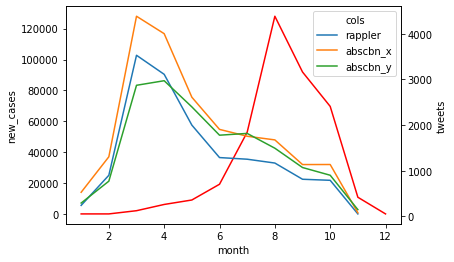

In [112]:
sns.lineplot(data = df2, x = 'month', y = 'new_cases', color='red')
ax2 = plt.twinx()
sns.lineplot(data = df, x = 'month_no', y = 'tweets', hue = 'cols', ax = ax2)